In [1]:
import pandas as pd 

In [7]:
weather = pd.read_csv("chennai_weather.csv", index_col="DATE")

In [8]:
weather 

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
1987-01-01,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.00,"D,,S",74,"H,,S",84.0,",,S",NaN,NaN
1987-01-02,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.00,"D,,S",75,"H,,S",83.0,",,S",67.0,",,S"
1987-01-03,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.00,"D,,S",77,"H,,S",82.0,",,S",70.0,",,S"
1987-01-04,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.00,"D,,S",76,"H,,S",84.0,",,S",NaN,NaN
1987-01-05,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.00,"D,,S",76,"H,,S",83.0,",,S",69.0,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.12,",,S",82,"H,,S",NaN,NaN,77.0,",,S"
2023-11-25,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,1.50,",,S",81,"H,,S",90.0,",,S",75.0,",,S"
2023-11-26,IN020040900,"MADRAS MINAMBAKKAM, IN",13.0,80.183,16.0,0.04,",,S",80,"H,,S",NaN,NaN,NaN,NaN


In [9]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
PRCP               0.416226
PRCP_ATTRIBUTES    0.416226
TAVG               0.000000
TAVG_ATTRIBUTES    0.000000
TMAX               0.170897
TMAX_ATTRIBUTES    0.170897
TMIN               0.281876
TMIN_ATTRIBUTES    0.281876
dtype: float64

In [11]:
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()
core_weather.columns = ['percip', 'temp_max', "temp_min"]

In [12]:
core_weather

,percip,temp_max,temp_min
DATE,,,
1987-01-01,0.00,84.0,NaN
1987-01-02,0.00,83.0,67.0
1987-01-03,0.00,82.0,70.0
1987-01-04,0.00,84.0,NaN
1987-01-05,0.00,83.0,69.0
...,...,...,...
2023-11-24,0.12,NaN,77.0
2023-11-25,1.50,90.0,75.0
2023-11-26,0.04,NaN,NaN


In [13]:
core_weather["percip"].value_counts()

0.00    4827
0.02     284
0.01     242
0.04     196
0.08     180
        ... 
1.23       1
4.98       1
1.98       1
1.74       1
6.22       1
Name: percip, Length: 275, dtype: int64

In [14]:
core_weather["percip"].fillna(0)

DATE
1987-01-01    0.00
1987-01-02    0.00
1987-01-03    0.00
1987-01-04    0.00
1987-01-05    0.00
              ... 
2023-11-24    0.12
2023-11-25    1.50
2023-11-26    0.04
2023-11-27    1.06
2023-11-28    0.35
Name: percip, Length: 13435, dtype: float64

In [16]:
core_weather[pd.isnull(core_weather["temp_min"])]

,percip,temp_max,temp_min
DATE,,,
1987-01-01,0.00,84.0,NaN
1987-01-04,0.00,84.0,NaN
1987-02-11,0.00,85.0,NaN
1987-02-14,0.00,85.0,NaN
1987-02-20,0.00,87.0,NaN
...,...,...,...
2023-11-03,0.59,89.0,NaN
2023-11-09,0.03,89.0,NaN
2023-11-11,0.00,90.0,NaN


In [17]:
core_weather = core_weather.fillna(method='ffill')

In [18]:
core_weather

,percip,temp_max,temp_min
DATE,,,
1987-01-01,0.00,84.0,NaN
1987-01-02,0.00,83.0,67.0
1987-01-03,0.00,82.0,70.0
1987-01-04,0.00,84.0,70.0
1987-01-05,0.00,83.0,69.0
...,...,...,...
2023-11-24,0.12,84.0,77.0
2023-11-25,1.50,90.0,75.0
2023-11-26,0.04,90.0,75.0


In [21]:
core_weather["temp_min"].fillna(0)

DATE
1987-01-01     0.0
1987-01-02    67.0
1987-01-03    70.0
1987-01-04    70.0
1987-01-05    69.0
              ... 
2023-11-24    77.0
2023-11-25    75.0
2023-11-26    75.0
2023-11-27    74.0
2023-11-28    76.0
Name: temp_min, Length: 13435, dtype: float64

In [22]:
core_weather.apply(lambda x: (x == 9999).sum())

percip      0
temp_max    0
temp_min    0
dtype: int64

In [23]:
core_weather.index

Index(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04', '1987-01-05',
       '1987-01-06', '1987-01-07', '1987-01-08', '1987-01-09', '1987-01-10',
       ...
       '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23',
       '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28'],
      dtype='object', name='DATE', length=13435)

In [24]:
core_weather.index = pd.to_datetime(core_weather.index)

In [25]:
core_weather.index

DatetimeIndex(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04',
               '1987-01-05', '1987-01-06', '1987-01-07', '1987-01-08',
               '1987-01-09', '1987-01-10',
               ...
               '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28'],
              dtype='datetime64[ns]', name='DATE', length=13435, freq=None)

In [26]:
core_weather.index.year

Int64Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=13435)

<Axes: xlabel='DATE'>

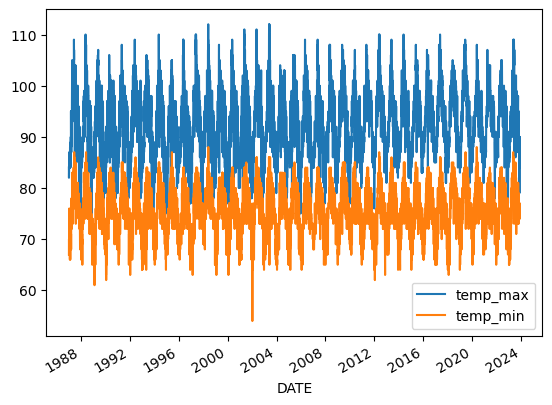

In [27]:
core_weather[["temp_max", "temp_min"]].plot()

In [59]:
core_weather["target"] = core_weather["temp_max"]

In [60]:
core_weather

,percip,temp_max,temp_min,target
DATE,,,,
1987-01-01,0.00,84.0,NaN,84.0
1987-01-02,0.00,83.0,67.0,83.0
1987-01-03,0.00,82.0,70.0,82.0
1987-01-04,0.00,84.0,70.0,84.0
1987-01-05,0.00,83.0,69.0,83.0
...,...,...,...,...
2023-11-23,0.31,84.0,75.0,84.0
2023-11-24,0.12,84.0,77.0,84.0
2023-11-25,1.50,90.0,75.0,90.0


In [61]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [62]:
predictors = ["percip", "temp_max", "temp_min"]

In [63]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [64]:
train

,percip,temp_max,temp_min,target
DATE,,,,
1987-01-01,0.0,84.0,NaN,84.0
1987-01-02,0.0,83.0,67.0,83.0
1987-01-03,0.0,82.0,70.0,82.0
1987-01-04,0.0,84.0,70.0,84.0
1987-01-05,0.0,83.0,69.0,83.0
...,...,...,...,...
2020-12-27,0.0,85.0,71.0,85.0
2020-12-28,0.0,85.0,70.0,85.0
2020-12-29,0.0,85.0,74.0,85.0


In [65]:
test

,percip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,85.0,71.0,85.0
2021-01-02,0.00,85.0,71.0,85.0
2021-01-03,0.00,85.0,74.0,85.0
2021-01-04,0.00,85.0,72.0,85.0
2021-01-05,1.77,86.0,72.0,86.0
...,...,...,...,...
2023-11-23,0.31,84.0,75.0,84.0
2023-11-24,0.12,84.0,77.0,84.0
2023-11-25,1.50,90.0,75.0,90.0


In [67]:
core_weather["temp_min"].fillna(0)

DATE
1987-01-01     0.0
1987-01-02    67.0
1987-01-03    70.0
1987-01-04    70.0
1987-01-05    69.0
              ... 
2023-11-23    75.0
2023-11-24    77.0
2023-11-25    75.0
2023-11-26    75.0
2023-11-27    74.0
Name: temp_min, Length: 13434, dtype: float64

In [68]:
core_weather

,percip,temp_max,temp_min,target
DATE,,,,
1987-01-01,0.00,84.0,NaN,84.0
1987-01-02,0.00,83.0,67.0,83.0
1987-01-03,0.00,82.0,70.0,82.0
1987-01-04,0.00,84.0,70.0,84.0
1987-01-05,0.00,83.0,69.0,83.0
...,...,...,...,...
2023-11-23,0.31,84.0,75.0,84.0
2023-11-24,0.12,84.0,77.0,84.0
2023-11-25,1.50,90.0,75.0,90.0


In [69]:
core_weather["temp_min"].fillna(0)

DATE
1987-01-01     0.0
1987-01-02    67.0
1987-01-03    70.0
1987-01-04    70.0
1987-01-05    69.0
              ... 
2023-11-23    75.0
2023-11-24    77.0
2023-11-25    75.0
2023-11-26    75.0
2023-11-27    74.0
Name: temp_min, Length: 13434, dtype: float64

In [71]:
core_weather = core_weather.drop('1987-01-01')

In [73]:
core_weather

,percip,temp_max,temp_min,target
DATE,,,,
1987-01-02,0.00,83.0,67.0,83.0
1987-01-03,0.00,82.0,70.0,82.0
1987-01-04,0.00,84.0,70.0,84.0
1987-01-05,0.00,83.0,69.0,83.0
1987-01-06,0.00,83.0,67.0,83.0
...,...,...,...,...
2023-11-23,0.31,84.0,75.0,84.0
2023-11-24,0.12,84.0,77.0,84.0
2023-11-25,1.50,90.0,75.0,90.0


In [74]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [75]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [76]:
train 

,percip,temp_max,temp_min,target
DATE,,,,
1987-01-02,0.0,83.0,67.0,83.0
1987-01-03,0.0,82.0,70.0,82.0
1987-01-04,0.0,84.0,70.0,84.0
1987-01-05,0.0,83.0,69.0,83.0
1987-01-06,0.0,83.0,67.0,83.0
...,...,...,...,...
2020-12-27,0.0,85.0,71.0,85.0
2020-12-28,0.0,85.0,70.0,85.0
2020-12-29,0.0,85.0,74.0,85.0


In [77]:
test 

,percip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,85.0,71.0,85.0
2021-01-02,0.00,85.0,71.0,85.0
2021-01-03,0.00,85.0,74.0,85.0
2021-01-04,0.00,85.0,72.0,85.0
2021-01-05,1.77,86.0,72.0,86.0
...,...,...,...,...
2023-11-23,0.31,84.0,75.0,84.0
2023-11-24,0.12,84.0,77.0,84.0
2023-11-25,1.50,90.0,75.0,90.0


In [78]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [79]:
predictions = reg.predict(test[predictors])

In [80]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

4.203234169195428e-12

In [99]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]


In [100]:
combined

,actual,predictions
DATE,,
2021-01-01,85.0,85.000002
2021-01-02,85.0,85.000002
2021-01-03,85.0,85.000003
2021-01-04,85.0,85.000002
2021-01-05,86.0,86.000000
2021-01-06,86.0,85.999998
2021-01-07,86.0,86.000001
2021-01-08,84.0,84.000004
2021-01-09,84.0,84.000004


<Axes: xlabel='DATE'>

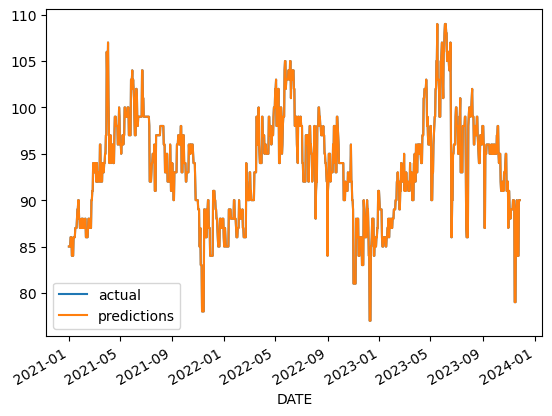

In [101]:
combined.plot()

In [85]:
reg.coef_

array([-7.48315762e-07,  9.99999470e-01,  5.22512576e-07])

In [86]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [87]:
core_weather = core_weather.iloc[30:,:].copy()

In [88]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [90]:
predictors = ["percip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

2.5040338976771723e-10

In [91]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [92]:
combined 

,actual,predictions,diff
DATE,,,
2021-01-01,85.0,84.999987,1.281007e-05
2021-01-02,85.0,84.999987,1.281007e-05
2021-01-03,85.0,84.999999,1.440604e-06
2021-01-04,85.0,84.999988,1.179480e-05
2021-01-05,86.0,85.999999,5.929321e-07
...,...,...,...
2023-11-23,84.0,84.000000,1.618606e-07
2023-11-24,84.0,84.000025,2.489056e-05
2023-11-25,90.0,90.000007,7.336553e-06


In [93]:
pd.set_option('display.max_columns', None)

In [94]:
combined

,actual,predictions,diff
DATE,,,
2021-01-01,85.0,84.999987,1.281007e-05
2021-01-02,85.0,84.999987,1.281007e-05
2021-01-03,85.0,84.999999,1.440604e-06
2021-01-04,85.0,84.999988,1.179480e-05
2021-01-05,86.0,85.999999,5.929321e-07
...,...,...,...
2023-11-23,84.0,84.000000,1.618606e-07
2023-11-24,84.0,84.000025,2.489056e-05
2023-11-25,90.0,90.000007,7.336553e-06


In [95]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

,actual,predictions,diff
DATE,,,
2021-01-01,85.0,84.999987,1.281007e-05
2021-01-02,85.0,84.999987,1.281007e-05
2021-01-03,85.0,84.999999,1.440604e-06
2021-01-04,85.0,84.999988,1.179480e-05
2021-01-05,86.0,85.999999,5.929321e-07
2021-01-06,86.0,86.000014,1.444568e-05
2021-01-07,86.0,86.000007,7.324803e-06
2021-01-08,84.0,84.000006,5.678811e-06
2021-01-09,84.0,83.999996,4.022409e-06
